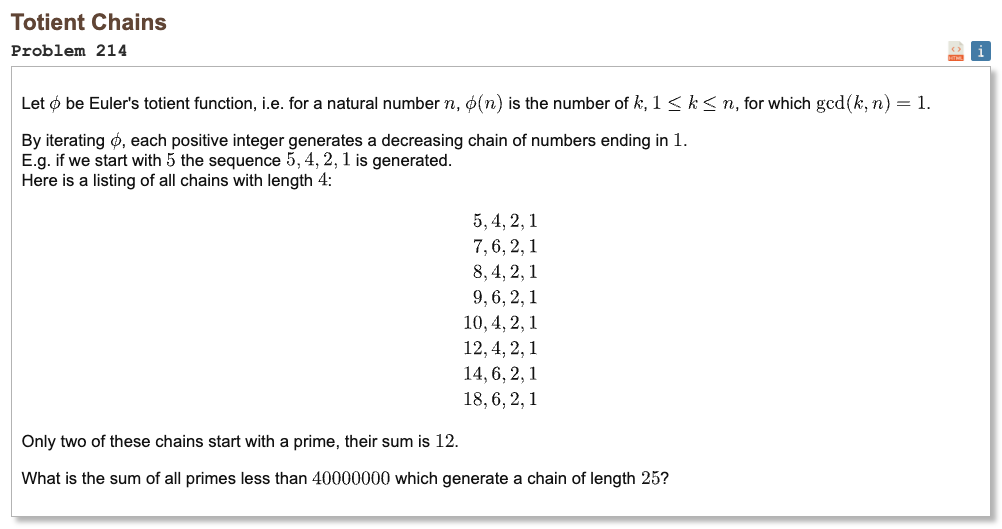

## Initial approach

* notice that every chain always goes down because phi(n) is smaller than n for n > 1
* compute phi for every number up to 39,999,999 using a linear sieve so it is fast and uses one pass
* while scanning numbers upward, you can also compute chain length because phi(i) is already known and is always less than i
* define len(1) = 1 and for i > 1 set len(i) = len(phi(i)) + 1
* a number i is prime exactly when phi(i) = i - 1 in this sieve, so you can test primeness without a separate prime sieve
* sum primes p where p < 40,000,000 and len(p) = 25
* use the array module to store phi as 32 bit ints and lengths as bytes to keep memory reasonable

In [1]:
from array import array

def solve():
    limit = 40_000_000
    n = limit - 1

    phi = array("I", [0]) * (n + 1)
    clen = array("B", [0]) * (n + 1)

    phi[1] = 1
    clen[1] = 1

    primes = []
    append_prime = primes.append
    phi_arr = phi
    clen_arr = clen

    total = 0

    for i in range(2, n + 1):
        if phi_arr[i] == 0:
            phi_arr[i] = i - 1
            append_prime(i)

        clen_arr[i] = clen_arr[phi_arr[i]] + 1

        if phi_arr[i] == i - 1 and clen_arr[i] == 25:
            total += i

        for p in primes:
            ip = i * p
            if ip > n:
                break
            if i % p == 0:
                phi_arr[ip] = phi_arr[i] * p
                break
            else:
                phi_arr[ip] = phi_arr[i] * (p - 1)

    return total

In [2]:
%%time 
result = solve()
print("Result:", result)

Result: 1677366278943
CPU times: user 8.83 s, sys: 75.6 ms, total: 8.91 s
Wall time: 8.92 s
